# Atividade Aula 12-11-2024
Aluno: DIOGO DA SILVEIRA RIBEIRO
Matricula: 029998000ADS000076

Proposta de análise exploratória de dados no conjunto disponível em: https://www.kaggle.com/datasets/fundal/sat-by-year-and-gender-1967-2001

1. As seguintes perguntas devem ser respondidas:

		- Calcular as médias dos indicadores por década, por sexo e por teste (VERBAL ou MATEMATICA)

		- Fazer um gráfico de barras para indicar a média por década para cada indicador separando por sexo e por teste

		- Fazer um gráfico de linhas mostrando a evolução ao longo dos anos de cada indicador

		- Verificar se existem outliers por meio de boxplot de cada indicado

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import margins


### Importando a base de dados

In [7]:
df = pd.read_csv('./archive/SAT_by_Year_Gender_1967_2001.csv')

Mostrando os cinco primeiro da tabela

In [8]:
df.head()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
0,1967,540,545,535,495,543,516,538,520,529
1,1968,541,543,533,497,543,516,537,520,528
2,1969,536,543,534,498,540,517,535,520,528
3,1970,536,538,531,493,537,512,534,516,524
4,1971,531,534,529,494,532,513,530,514,522


Mostrando os cinco ultimo da tabela

In [9]:
df.tail()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
30,1997,507,503,530,494,505,511,518,498,508
31,1998,509,502,531,496,505,512,520,499,510
32,1999,509,502,531,495,505,511,520,498,509
33,2000,507,504,533,498,505,514,520,501,510
34,2001,509,502,533,498,506,514,521,500,510


In [12]:
df['Decada'] = pd.cut(x=df['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010], labels=['1960s', '1970s', '1980s', '1990s', '2000s'], right=False)

In [13]:
df.head()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages,Decada
0,1967,540,545,535,495,543,516,538,520,529,1960s
1,1968,541,543,533,497,543,516,537,520,528,1960s
2,1969,536,543,534,498,540,517,535,520,528,1960s
3,1970,536,538,531,493,537,512,534,516,524,1970s
4,1971,531,534,529,494,532,513,530,514,522,1970s


In [14]:
df.tail()

,Year,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages,Decada
30,1997,507,503,530,494,505,511,518,498,508,1990s
31,1998,509,502,531,496,505,512,520,499,510,1990s
32,1999,509,502,531,495,505,511,520,498,509,1990s
33,2000,507,504,533,498,505,514,520,501,510,2000s
34,2001,509,502,533,498,506,514,521,500,510,2000s


In [22]:
df_decade_means = df.drop('Year', axis=1).groupby('Decada', observed=False).mean()
df_decade_means.reset_index(inplace=True)

In [23]:
df_decade_means

,Decada,M_verbal,F_verbal,M_math,F_math,A_verbal,A_math,M_averages,F_averages,A_averages
0,1960s,539.0,543.666667,534.0,496.666667,542.0,516.333333,536.666667,520.0,528.333333
1,1970s,520.0,516.800000,522.7,482.800000,518.3,502.300000,521.300000,499.9,510.500000
2,1980s,510.5,499.500000,519.3,477.600000,504.9,497.200000,514.700000,488.7,501.600000
3,1990s,505.4,499.300000,525.3,488.700000,502.2,505.700000,515.300000,493.9,504.600000
4,2000s,508.0,503.000000,533.0,498.000000,505.5,514.000000,520.500000,500.5,510.000000


### Gráfico de barras para as médias por década



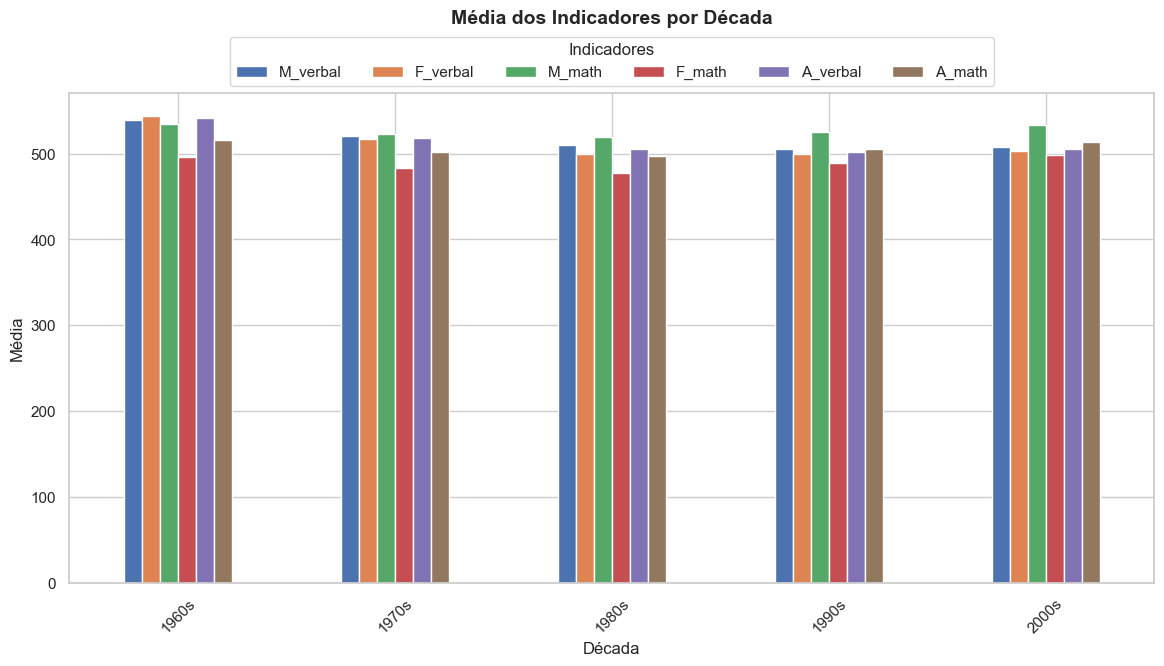

In [53]:
ax = df_decade_means[['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math']].plot(kind='bar', figsize=(14, 7))
ax.set_title('Média dos Indicadores por Década', fontsize=14, fontweight='bold', pad=50)
plt.subplots_adjust(top=0.85, bottom=0.15)
ax.set_ylabel('Média')
ax.set_xlabel('Década')
ax.set_xticklabels(['1960s', '1970s', '1980s', '1990s', '2000s'])
plt.xticks(rotation=45)
ax.legend(title='Indicadores', loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=6)
plt.show()

## Gráfico de linhas para a evolução ao longo dos anos



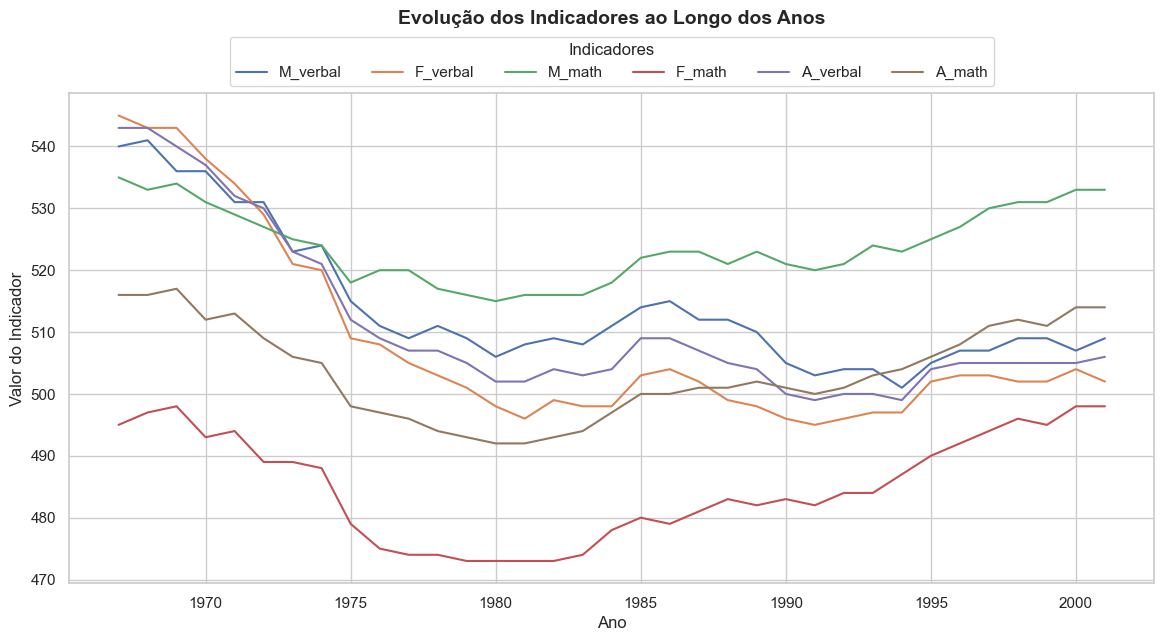

In [52]:
df.plot(x='Year', y=['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math'], figsize=(14, 7))
plt.title('Evolução dos Indicadores ao Longo dos Anos', fontsize=14, fontweight='bold', pad=50)
plt.subplots_adjust(top=0.85, bottom=0.15)
plt.ylabel('Valor do Indicador')
plt.xlabel('Ano')
plt.legend(title='Indicadores', loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=6)
plt.show()

## Configuração do estilo do seaborn

In [37]:
sns.set_theme(style="whitegrid")

## Criação do boxplot

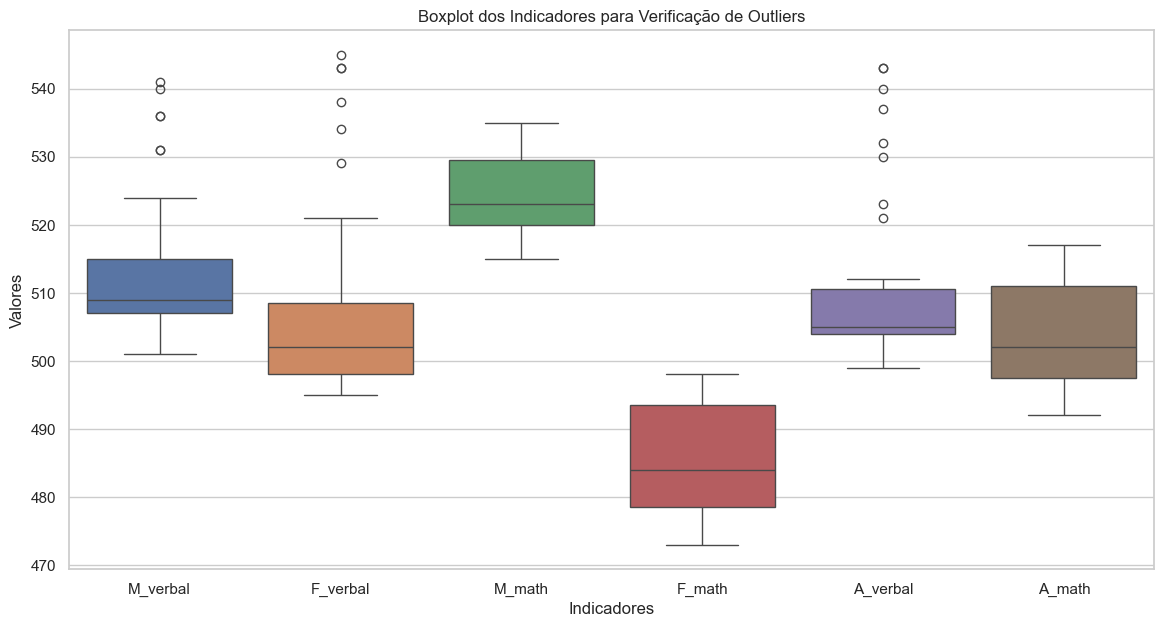

In [38]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['M_verbal', 'F_verbal', 'M_math', 'F_math', 'A_verbal', 'A_math']])
plt.title('Boxplot dos Indicadores para Verificação de Outliers')
plt.xlabel('Indicadores')
plt.ylabel('Valores')
plt.show()